# Redwine

Namen - Studentennummer
* Quinn de Groot
* Kaai ter Horst
* Amaryllis Lee  - 1735290

### Casusopdracht
Voor deze casus moeten we een data science pipeline maken, waarbij we dataset redwine.csv analyseert. Het uitgangspunt van de analyse is een aantal onderzoeksvragen. Vervolgens doorloop je het data science proces van CRISP-DM en leg je de resultaten op een reproduceerbare manier vast in Jupyter Notebook.

### Onderzoeksvragen

Er zijn drie onderzoekesvragen beschreven, waar een verplecht is van de opdracht en 2 zelf bedacht zijn.Bovendien zijn er ook de eisen die we zullen toepassen voor elke ondezeoksvraag.

 1.	**In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?**
    1.	Toepassing van een supervised machine learning 
    2.	Correlatieonderzoek
    
2.	**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
    1.	Toepassing van een unsupervised machine learning
    2.	Gebruik van externe dataset
    
3.	**Wat is het verband tusen de ingredienten van de wijnen en de regio's?**
    1.	Interactieve visualisatie
    2.	Toepassing van supervised learning.


## Inhoud

1. Data Understanding
    - Data Collection 
    - Data exploration & analysis
2. Data Preparation
    - Data munging
    - Data cleaning
3. Data Analyses
    - Analyse oderzoeksvraag 1
    - Analyse onderzoeksvraag 2
    - Analyse onderzoeksvraag 3


## Data Understanding 

### Data Collection 
In de Data Collection zullen de libraries gaan importeren, de toegewezen datasets en de externe dataset gaan inlezenen bekijken.
De bron voor de externe dataset: https://www.kaggle.com/piyushgoyal443/red-wine-dataset

#### Libraries importeren 

In [294]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Datasets inlezen en verkennen 

In [370]:
# load dataset redwine.csv
df = pd.read_csv('redwine.csv',encoding  = "cp1252", delimiter = ';')
# De attributen van de dataset  bekijken
df.describe()

,id,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,2465.000000,2465.000000,2196.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,1233.089655,88.811359,24.819217,8.352819,0.528162,2.562353,0.087485,15.804665,47.218661,3.311201,0.660353
std,711.869967,2.974000,25.539475,1.734847,0.178869,1.407030,0.047043,10.379218,33.187830,0.153927,0.172531
min,1.000000,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,617.000000,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,1233.000000,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,1849.000000,91.000000,28.000000,9.300000,0.635000,2.600000,0.091000,21.000000,64.000000,3.400000,0.730000
max,2466.000000,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


In [371]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Data exploration

Er zal in de data redwine.csv ( **df** ) de *features* word bekeken.Er wordt gezien of de *feautures* in de dataset compleet is en goed is voor het oplossen van de onderzoeksvragen 

In [372]:
# Dimensie bekijken van df 
df.shape 

(2465, 22)

In [373]:
# Return een lijst van de features in de dataset
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [374]:
# De datypes voor elke feature
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

In [375]:
#Bekijk de waardes van de features.
df.head(5)

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4



- Numerieke features:  
    - id
    - points 
    - price
    - fixed_acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - pH 
    - sulphates
    - alcohol
- Characters (string) Features
    - country                  # moet verwijdert worden, alle waarden = Portugal
    - description              
    - designation               
    - province                 
    - taster_name              
    - title                    
    - variety                  # moet verwijderd worden
    - winery                   
    
  

In [376]:
print(df['variety'].unique()) # Er is te zien dat alle wijnen zij Portuguese Red, dus dit kolom kunnen we verwijderen .
print(df['country'].unique()) # Er is te zien dat alle wijnen zij Portugal, dus dit kolom kunnen we verwijderen.

['Portuguese Red']
['Portugal']


Alle features die de datatype object heeft, moet de volgende datatypes hebben.
! : features die we gaan gebruiken om onderzoeksvragen op te lossen.
* country                  object 
* description              object 
* designation              object
* province                 object 
* taster_name              object 
* title                    object
* variety                  object  
* winery                   object  
* citric acid              object - float!
* density                  object - float!
* alcohol                  object - float!

In [377]:
df['citric acid'].head(10)

0      0.4
1     0.37
2     0.07
3     0.07
4     0.34
5     0.42
6     0.43
7     -   
8     0.41
9     0.07
Name: citric acid, dtype: object

In [378]:
# de datatypes van de nodige features veranderen 
# we gebruiken errors = 'coerce' om alle invalid parsing naar NaN te zetten.
df['citric acid'] = pd.to_numeric(df['citric acid'], errors = 'coerce')
df['density']     = pd.to_numeric(df['density'], errors = 'coerce')
df['alcohol']     = pd.to_numeric(df['alcohol'], errors = 'coerce')

In [379]:
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

#### Missend waardes
Er wordt bekeken of er missend waardes zijn in de kolommen. Verder wordt deze missend waardes verwerkt of verwijdert.

In [380]:
df.isnull().sum()

id                        0
country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid             203
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   1
pH                        0
sulphates                 0
alcohol                  10
dtype: int64

Aan de hand van de data exploration, kunnen we de volgende kolommen verwijderen:
* country : Deze kolom bevat alleen de waarde Portugal, we kunnen concluderen dat alle wijen komt van Portugal
* variety : Deze kolom bevat alleen de waarde Portuguese Red
* designation  en price: Deze kolommen zullen we niet gaan gebruiken om onze onderzoeksvragen op te lossen en ze  bevatten veel NaN waarden. 

In [381]:
#kolommen verwijderen 
df = df.drop(['country'], axis = 1)
df = df.drop(['variety'], axis = 1)
df = df.drop(['designation'], axis = 1)
df = df.drop(['price'], axis = 1)

### Data  analysis
*In deze sectie worden een analyse uitgevoerd op de dataset voor de onderzoeksvragen*
Hier worden gekeken naar de 

#### Analyse  onderzoeksvraag 3: 
In deze analyse gaan we de unieke aantal wijnen per regio bepalen. Hiermee kunnen we een steekproef nemen van de provincie die minstens een aantal wijnen bevatten.

In [49]:
#informatie halen van kolom 'province'
df['province'].describe() 

count      2465
unique       30
top       Douro
freq        880
Name: province, dtype: object

Uit de bovenstaande code kunnen we de onderstaande informatie uithalen:
* count : Er zijn 2456 regio's
* unique : Uit de 2456 regio's zijn er 30 unieke regio's
* top : Duoro's is de meeste voorkomende regio
* freq : De regio komt voor 880 keer in de kolom

In [50]:
#aantal wijnen per regio
wijnen_regios = df.groupby(df['province'].loc[df['points'] > 0]).count()['title']

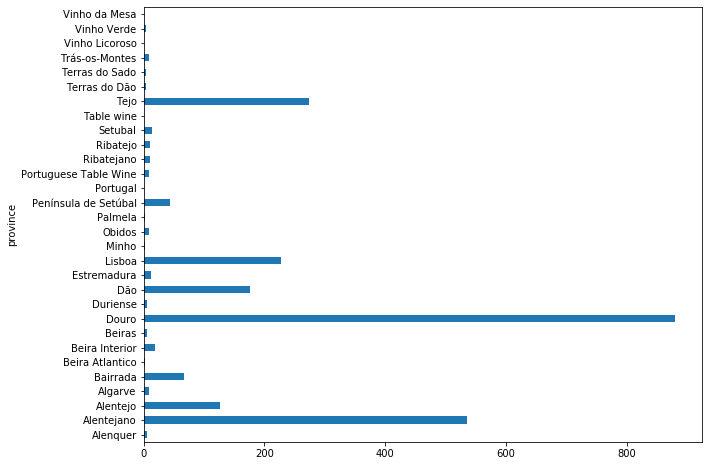

In [17]:

plt.figure(figsize = (10,8) )
wijnen_regios.plot(kind = 'barh', stacked = True)

In [18]:
# aantal unieke wijnen per regio bepalen
unieke_wijnen = list(df.groupby(df['province'].loc[df['points'] > 0]).count()['title'])
unieke_regios = [str(i) for i in df['province'].unique()] # zet alle unieke regio's in een lijst

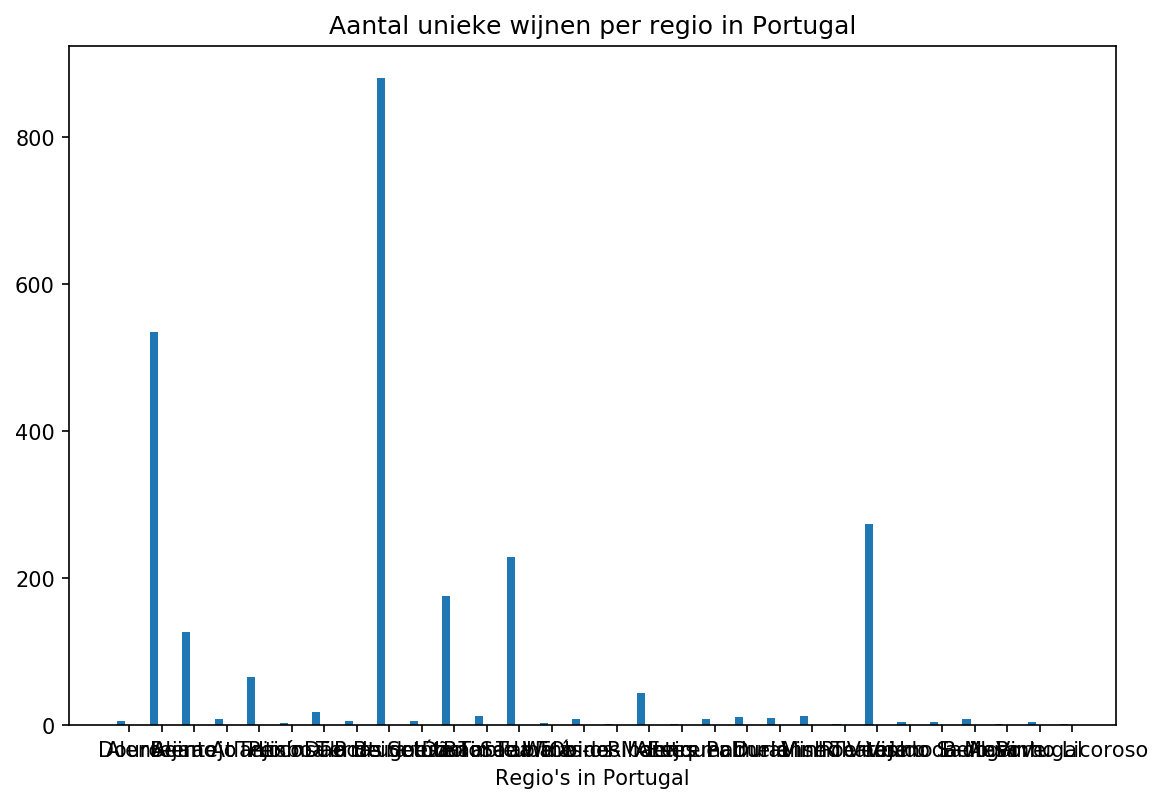

In [19]:
#visualiseer in een staaf diagram
bar_width = 0.25

plt.figure(figsize = (9,6), dpi=150)

#Data 
index = np.arange(len(df['province'].unique()))  # the label locations
plt.bar(index, unieke_wijnen, bar_width)

#Assen 
plt.title('Aantal unieke wijnen per regio in Portugal')
plt.xlabel('Regio\'s in Portugal')
plt.xticks(index + bar_width,unieke_regios)

#TODO : alle x cpprdinaten (regio's) in de grafiek laten tonen.

plt.show()

Deze grafiek geeft de aantal unieke wijnen per regio. 
Elke bar geeft een provincie aan.
Hiermee kunnen we zien welke provincies kunnen  we nemne als selectie om onze onderzoeksvragen op te lossen.

Aan de hand van de grafieken, nemen we een selectie van alle regio's die meer dan 10 wijnen hebt.

#### Analyse  onderzoeksvraag 2: 

1. Externe dataset
3. boxplot voor elke chemische samenstelling

In [20]:
# minimum - maximum points
print("Mininum punten " + str(df['points'].min()))
print("Maximum punten " + str(df['points'].max()))
#gemiddelde van kolom points
print("Gemiddelde punten " + str(df['points'].mean()))

Mininum punten 81
Maximum punten 100
Gemiddelde punten 88.81135902636917


In [21]:
len(df[df['points'] > 88.81135902636917]) # er zijn 1217 rijen die boven de gemiddele scoren.

1217

In [22]:
#Kijk de aantal verschillende wijnen die boven de gemiddelde scoren
len(list(set(df['title'].loc[df['points'] > 88.81135902636917])))

1136

In [23]:
list(set(df['title'].loc[df['points'] > 88.81135902636917])) # alle namen van de wijnen die een boven gemiddelde score heeft.

['Quanta Terra 2011 Terra a Terra Reserva Red (Douro)',
 'Secret Spot Wines 2013 Crooked Vines Colheita Red (Douro)',
 'Quinta das Carvalhas 2013 Carvalhas Vinhas Velhas Red (Douro)',
 'Poças 2009 Vale de Cavalos Red (Douro)',
 'Quinta da Romaneira 2005 R de Romaneira Red (Douro)',
 'Quinta do Passadouro 2008 Passadouro Red (Douro)',
 'Lemos & Van Zeller 2011 CV Curriculum Vitae Red (Douro)',
 'Quinta do Perdigão 2012 Red (Dão)',
 'Adega Cooperativa de Borba 2002 Garrafeira Red (Alentejo)',
 'Casa Santos Lima 2012 Reserva do Monte Red (Lisboa)',
 'Conceito Vinhos 2015 Unico Red (Douro)',
 'Quinta do Carmo 2004 Reserva Red (Alentejano)',
 'Cortes de Cima 2007 Aragonez Red (Alentejano)',
 'Luis Duarte 2014 Rubrica Tinto Red (Alentejano)',
 'Magnum Vinhos 2014 Tom de Baton Red (Douro)',
 'Quinta do Passadouro 2012 Reserva Red (Douro)',
 'Alves de Sousa 2011 Quinta da Gaivosa Vinha de Lordelo Red (Douro)',
 'Casal da Coelheira 2013 Mythos Red (Tejo)',
 'Quinta da Romaneira 2014 Tinto Red (

In [24]:
# informatie halen van de wijnen met een hoge score ten op zichte van de provincies.
df.groupby(df['province'].loc[df['points'] > 88.81135902636917]).count() 

,id,description,points,province,taster_name,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
province,,,,,,,,,,,,,,,,,,
Alenquer,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Alentejano,230,230,230,230,230,230,230,230,230,216,230,230,230,230,229,230,230,229
Alentejo,69,69,69,69,69,69,69,69,69,64,69,69,69,69,69,69,69,69
Algarve,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bairrada,34,34,34,34,34,34,34,34,34,27,34,34,34,34,34,34,34,34
Beira Atlantico,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Beira Interior,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Beiras,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Douro,536,536,536,536,536,536,536,536,536,494,536,536,536,536,536,536,536,532


In [25]:
#df.groupby(df['province'].loc[df['title'].unique()]).count()

In [26]:
df.groupby(df['taster_name'].loc[df['points'] > 0]).mean()['points'] # nu zien we dat alle wijn experts ongeveer dezelfde scor heeft en daardoor unbiased zijn.

taster_name
Alexander Peartree    88.500000
Anna Lee C. Iijima    88.892857
Anne Krebiehl MW      88.090909
Carrie Dykes          85.333333
Fiona Adams           88.666667
Jeff Jenssen          87.111111
Jim Gordon            88.710280
Joe Czerwinski        88.650350
Kerin O’Keefe         88.740310
Lauren Buzzeo         88.552632
Matt Kettmann         89.057143
Michael Schachner     89.054688
Mike DeSimone         89.600000
Paul Gregutt          88.899083
Roger Voss            88.779365
Sean P. Sullivan      88.648000
Susan Kostrzewa       89.068966
Virginie Boone        88.845455
Name: points, dtype: float64

In [27]:
# de verschil van de gemiddelde ingredienten per provincie.
df.groupby('province')[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]].mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
province,,,,,,,,,,,
Alenquer,8.333333,0.605000,0.256000,2.266667,0.078000,20.833333,63.666667,0.997268,3.308333,0.618333,9.833333
Alentejano,8.394766,0.545981,0.287267,2.500187,0.088938,15.149533,45.617757,2.296018,3.307944,0.644131,10.286985
Alentejo,8.106349,0.531310,0.279076,2.519444,0.088492,17.880952,51.039683,1.425535,3.329603,0.664206,10.480800
Algarve,8.400000,0.561875,0.185000,2.262500,0.072125,22.750000,67.750000,2.122829,3.318750,0.600000,9.700000
Bairrada,8.127273,0.524091,0.283621,2.360606,0.084894,17.621212,56.954545,2.497035,3.342727,0.653939,10.256061
Beira Atlantico,7.266667,0.540000,0.123333,2.266667,0.091667,15.666667,30.666667,0.995867,3.373333,0.603333,10.933333
Beira Interior,8.505556,0.435833,0.312941,2.344444,0.093833,12.222222,29.944444,0.996457,3.277778,0.727222,10.566667
Beiras,9.580000,0.383000,0.396000,2.190000,0.078000,12.600000,43.400000,0.997308,3.262000,0.670000,10.420000
Douro,8.381705,0.510392,0.311936,2.555909,0.087216,15.201705,44.635227,1.970435,3.310102,0.674341,10.569692


Boxplot tekenen van alle chemische samenstelling

In [28]:
# functie om ene boxplot te tekenen
def boxplot_tekenen(n,X):
    fig1, ax1 = plt.subplots()
    ax1.set_title(n)
    ax1.boxplot(X)

None
None
None
None
None

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],



None
None
None
None
None
None


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages

[None, None, None, None, None, None, None, None, None, None, None]

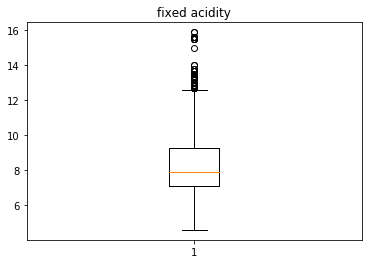

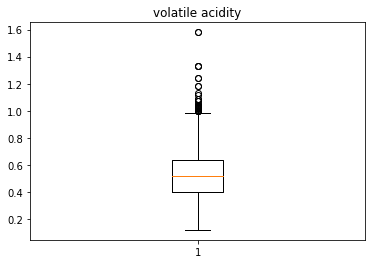

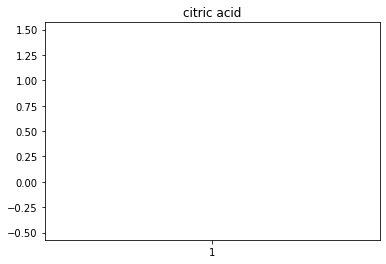

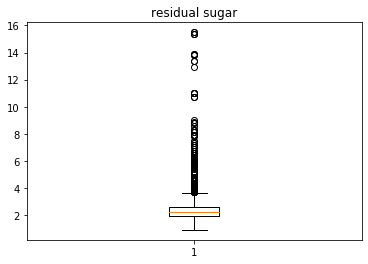

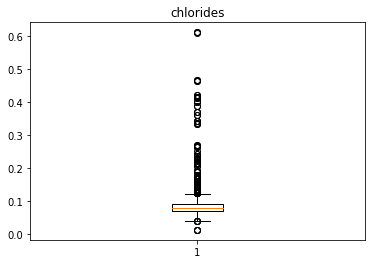

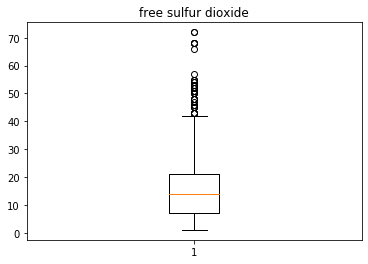

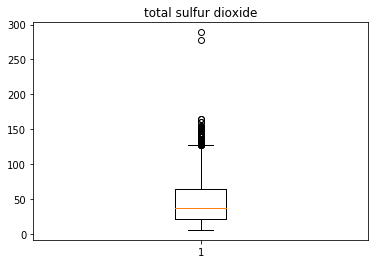

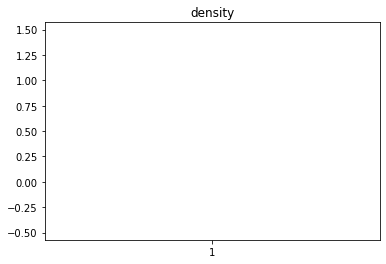

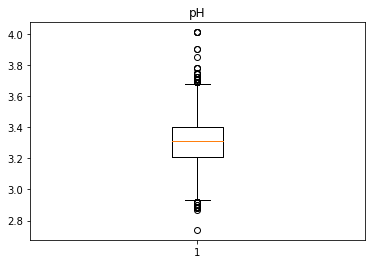

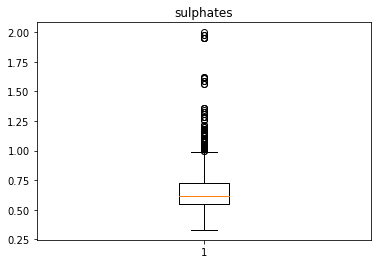

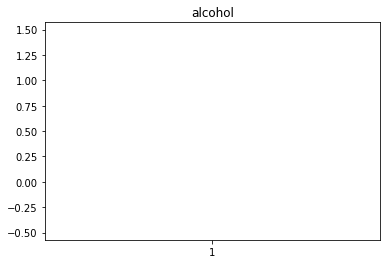

In [29]:
[print(boxplot_tekenen(i, list(df[i]))) for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

Aan de hand van deze boxplotten van de chemische samenstelling is te zien dat er zijn een aantal chemische samenstelling die we kunnen gebruiken om clustering toe te passen.
We kunnen deze analyse ook voor onderzoeksvraag 1 gebruiken. De bovenstaande informatie vertelt ons dat we kunnnen een aantal chemische samenstelling gebruiken om de score van een Portuguese Red te voorspellen.

#### Analyse  onderzoeksvraag 1: 

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [398]:
Hier probeerde ik de waardes te vervangen voor laag, midden, hoog zodat het KNN-model op de juiste manier toegepast kon worden.
#df3 = pd.DataFrame()
#df3['points'] = df['points']
#for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#      'chlorides', 'total sulfur dioxide', 'density',
#      'pH', 'sulphates', 'alcohol']:
#   df3[i] = (df[i]-df[i].mean())/df[i].std()

#df3.loc[df3['points'] <= 87, 'points'] = 1
#df3.loc[(df3['points'] > 87) & (df3['points'] <= 94), 'points'] = 2
#df3.loc[df3['points'] >= 95, 'points'] = 3

#df3['points'] = np.where((df.points == 1),'laag',df.points)
#df3['points'] = np.where((df3.points == 2),'midden',df3.points)
#df3['points'] = np.where((df3.points == 3),'hoog',df3.points)
#df3.head()

SyntaxError: invalid syntax (<ipython-input-398-3a5f81e3402a>, line 1)

Onderzoeksvraag 1: In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?

Bepaal de feature variabelen
Score: ordinaal
Volatile acidity: ordinaal
Resdidual sugar: ordinaal
Chlorides: ordinaal
Free sulfur dioxide: nog ordinaal maar wordt ratio (percentages)
Total sulfur dioxide: ordinaal
Ph: ordinaal
Sulphates: ordinaal

Geschikte modellen:
Scatterplot, Correlatie matrix, KNN-Model Chemische eigenschap tegen over de score om te kijken of clusters op elkaar vallen en wat de correlatiecoëfficiënt.

In [359]:
df3 = pd.DataFrame()
df3['points'] = df['points']
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    df2[i] = (df[i]-df[i].mean())/df[i].std()
df3.head()

,points,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,87,0.949468,-1.331489,0.542608,0.239972,0.223513,-0.639351,0.827454,1.096616,1.446967,-0.678378
1,91,-0.030446,-1.499210,0.380756,-0.826104,-0.244140,-0.729745,-0.126196,-0.332630,0.229796,-0.773452
2,90,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.790008,-0.126374,0.446959,-0.349809,0.842812
3,90,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.790008,-0.126374,0.446959,-0.349809,0.842812
4,92,-0.203372,-0.269260,0.218904,-0.257530,-0.307911,-0.669482,-0.126599,-0.202698,-0.002046,1.888630


Hier onder zie je per combinatie van de punten en de chemische stof een scatterplot en een correlatie matrix.

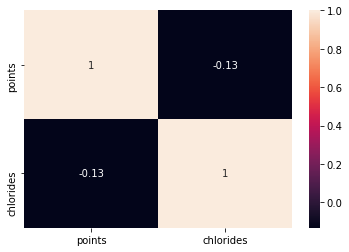

In [117]:
data = {'points': list(df['points']),
        'chlorides': list(df['chlorides']),
        }

df3 = pd.DataFrame(data,columns=['points','chlorides'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


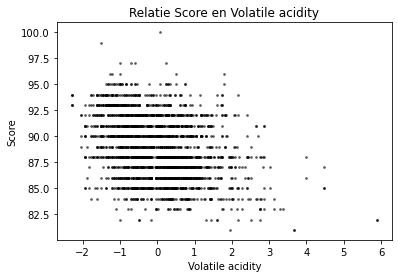

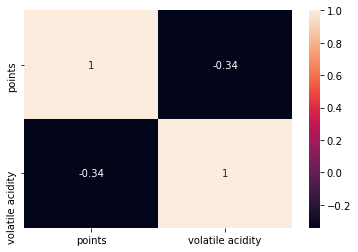

In [124]:
#scatterplot points tegen over volatile acidity
x = list(df3['volatile acidity'])
y = list(df3['points'])
colors = (0,0,0)
area = np.pi*1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Relatie Score en Volatile acidity')
plt.xlabel('Volatile acidity')
plt.ylabel('Score')
plt.show()

data = {'points': list(df3['points']),
        'volatile acidity': list(df3['volatile acidity']),
        }

df = pd.DataFrame(data,columns=['points','volatile acidity'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


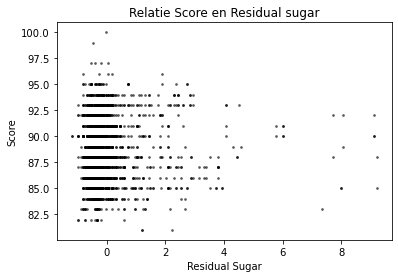

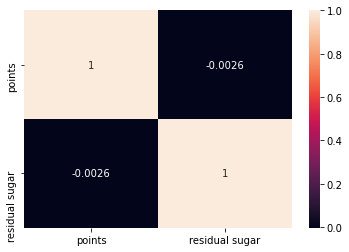

In [125]:
#scatterplot points tegen over residual sugar
x = list(df3['residual sugar'])
y = list(df3['points'])
colors = (0,0,0)
area = np.pi*1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Relatie Score en Residual sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Score')
plt.show()

data = {'points': list(df3['points']),
        'residual sugar': list(df3['residual sugar']),
        }

df = pd.DataFrame(data,columns=['points','residual sugar'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


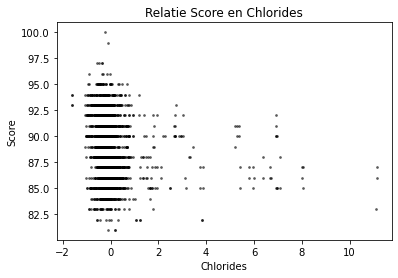

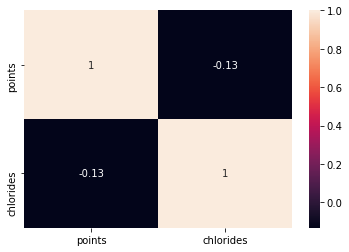

In [118]:
#scatterplot points tegen over chlorides
x = list(df3['chlorides'])
y = list(df3['points'])
colors = (0,0,0)
area = np.pi*1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Relatie Score en Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Score')
plt.show()

data = {'points': list(df3['points']),
        'chlorides': list(df3['chlorides']),
        }

df = pd.DataFrame(data,columns=['points','chlorides'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


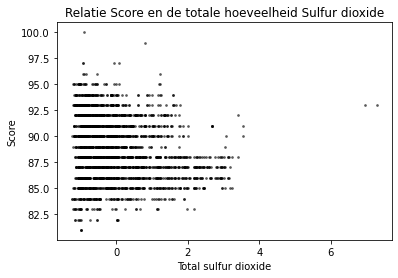

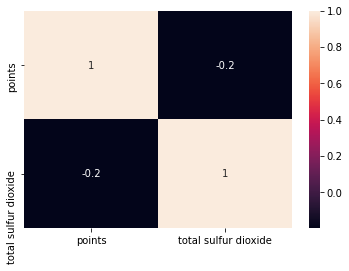

In [126]:
#scatterplot points tegen over de totale hoeveelheid sulfur dioxide
x = list(df3['total sulfur dioxide'])
y = list(df3['points'])
colors = (0,0,0)
area = np.pi*1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Relatie Score en de totale hoeveelheid Sulfur dioxide')
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Score')
plt.show()

data = {'points': list(df2['points']),
        'total sulfur dioxide': list(df3['total sulfur dioxide']),
        }

df = pd.DataFrame(data,columns=['points','total sulfur dioxide'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


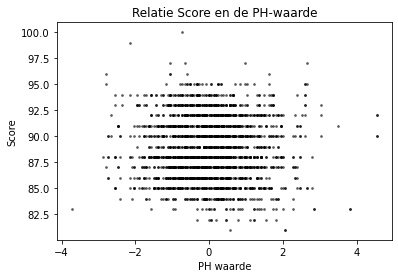

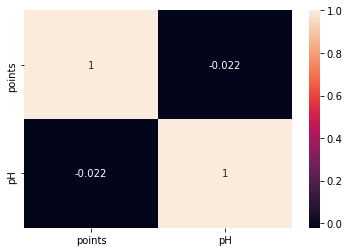

In [128]:
#scatterplot points tegen over de PH-waarde
x = list(df3['pH'])
y = list(df3['points'])
colors = (0,0,0)
area = np.pi*1

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Relatie Score en de PH-waarde')
plt.xlabel('PH waarde')
plt.ylabel('Score')
plt.show()

data = {'points': list(df3['points']),
        'pH': list(df3['pH']),
        }

df = pd.DataFrame(data,columns=['points','pH'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


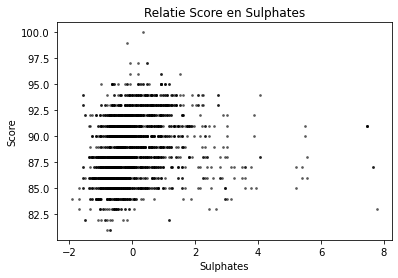

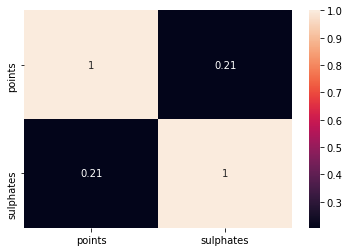

In [129]:
#scatterplot points tegen over Sulphates
x = list(df3['sulphates'])
y = list(df3['points'])
colors = (0,0,0)
area = np.pi*1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Relatie Score en Sulphates')
plt.xlabel('Sulphates')
plt.ylabel('Score')
plt.show()

data = {'points': list(df3['points']),
        'sulphates': list(df3['sulphates']),
        }

df = pd.DataFrame(data,columns=['points','sulphates'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [201]:
knn = KNeighborsClassifier()

In [202]:
x = df2[['volatile acidity','residual sugar','chlorides','total sulfur dioxide','pH','sulphates']]
y = df2['points']

In [203]:
# Splits de data in een train en een test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(f'{len(x_train)} trainwaarden, {len(x_test)} testwaarden: {len(x_train)*100/len(df2):.1f}%/{len(x_test)*100/len(df2):.1f}%')

1848 trainwaarden, 617 testwaarden: 75.0%/25.0%


In [242]:
# De hyper parameter
knn.set_params(n_neighbors = 2, weights = 'uniform')

KNeighborsClassifier(n_neighbors=2)

In [243]:
#deze functie traint het model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [244]:
# Deze functie valideert het model
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.22366288492706646

In [245]:
# Dit is de daadwerkelijke score
knn.score(x_test,y_test)

0.22366288492706646

Conclusie:
In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken? Ik ben hier niet achter gekomen. Ik heb namelijk het verkeerde model gebruikt. Ik maakte gebruik van het KNN-Model maar dat was niet geschikt omdat het aantal punten geen klasse is. Ik heb het proberen op te lossen door de punten in te delen in de klassen laag, midden en hoog maar dat stond de deadline niet toe. Maar met het KNN-Model behaal ik een accuracy van 22,37% en ik denk dat dat nog veel hoger kan wanneer ik de punten heb opgedeeld in klassen of wanneer ik het juiste model had gebruikt. En daarom denk ik dat de score van een Portugese Red wel te voorspellen is op basis zijn van chemische kenmerken.